In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.multitest import multipletests
import os
import sys
module_path = os.path.abspath('..')
if module_path not in sys.path:
    sys.path.append(module_path)
from nireact import task, rsa
fig_dir = '/Users/morton/Dropbox/work/mistr/figs2/plots'

## Load reaction time and organization measures

Load mean reaction time on correct test trials for each participant and test type (AB, BC, AC).

In [2]:
# load RTs for correct trials
rtc = task.test_rt('/Users/morton/work/mistr')

# load signals that may predict RT model parameters
rsa_dir = '/Users/morton/work/mistr/batch/rsa'
df_vector = rsa.load_zstat_full(os.path.join(rsa_dir, 
                                             'prepost_fix2_triad_vector_ac'))
vec = rsa.zstat_pivot(df_vector, 'pos')
df_vectri = rsa.load_zstat_full(os.path.join(rsa_dir, 
                                             'prepost_fix2_triad_vectri_ac'))
tri = rsa.zstat_pivot(df_vectri, 'pos')

## Test for triad separation

Test the regions that exhibited cross-triad organization (based on scrambling item type within triad) to determine if they also exhibit triad separation (based on scrambling triad within item type).

In [3]:
# did any region exhibit triad separation (z-score greater than 0)?
t, p = st.ttest_ind(tri.values, np.zeros(tri.shape), axis=0)
pv_corr = multipletests(p/2, method='fdr_bh')[1]
res = pd.DataFrame({'t': t, 'p': p/2, 'p_fdr': pv_corr}, index=tri.columns)
res

,t,p,p_fdr
roi,,,
lfpo,1.124540,0.133077,0.186307
lhpc,0.561881,0.288354,0.336413
llpc,0.358078,0.360896,0.360896
lphc,2.944916,0.002446,0.017122
mmpfc,1.477486,0.072908,0.127590
rdlpfc,2.077198,0.021470,0.056776
rfpo,2.020866,0.024332,0.056776


In [4]:
# was PHC separation different from separation in other regions?
tri_other = tri.loc[:, tri.columns != 'lphc']
t, p = st.ttest_ind(tri.lphc.values, tri_other.values, axis=0)
pv_corr = multipletests(p, method='fdr_bh')[1]
res = pd.DataFrame({'t': t, 'p': p, 'p_fdr': pv_corr}, index=tri_other.columns)
res

,t,p,p_fdr
roi,,,
lfpo,1.813839,0.075706,0.158758
lhpc,1.963608,0.055149,0.158758
llpc,1.790805,0.079379,0.158758
mmpfc,1.325190,0.191132,0.286698
rdlpfc,0.892392,0.376458,0.376458
rfpo,1.016897,0.314098,0.376458


In [5]:
# convert to two test types (pooling AB and BC)
rtc.loc[:, 'direct'] = (rtc.ab + rtc.bc) / 2

In [6]:
# combine into one dataset
df = pd.DataFrame({'subj_id': rtc.index,
                   'rt1': rtc.ab, 'rt2': rtc.bc, 
                   'rt3': rtc.ac, 'direct': rtc.direct,
                   'inference': rtc.ac})
for roi in ['lhpc', 'llpc', 'lphc']:
    df['vec_' + roi] = vec[roi].values
df['tri_lphc'] = tri['lphc'].values
df

,subj_id,rt1,rt2,rt3,direct,inference,vec_lhpc,vec_llpc,vec_lphc,tri_lphc
subj_id,,,,,,,,,,
mistr_02,mistr_02,2.332083,3.388636,3.431333,2.860360,3.431333,1.675940,0.977898,0.117770,-0.048016
mistr_04,mistr_04,2.718083,3.964000,5.006000,3.341042,5.006000,0.776422,0.488776,1.009990,-1.739244
mistr_05,mistr_05,3.331333,2.544500,4.804091,2.937917,4.804091,-0.909130,-0.614231,-0.308355,2.483805
mistr_06,mistr_06,4.028083,1.881750,5.536111,2.954917,5.536111,1.366204,1.473468,-0.257394,0.691660
mistr_07,mistr_07,1.378000,1.869167,3.133364,1.623583,3.133364,1.122338,1.366204,0.455934,1.713659
mistr_08,mistr_08,2.028833,1.781583,2.935000,1.905208,2.935000,1.876790,0.608330,1.534121,1.475843
mistr_09,mistr_09,2.815400,4.292833,5.676889,3.554117,5.676889,1.417797,0.650104,1.272699,0.607762
mistr_10,mistr_10,2.638500,3.345273,6.552364,2.991886,6.552364,0.112841,2.153875,0.743744,0.380021
mistr_12,mistr_12,1.853700,2.185091,5.838889,2.019395,5.838889,0.750215,-0.117770,0.674490,1.072330


## Test for differences between blocked and intermixed

Use the contrast between blocked and intermixed to test for differences in either direction. Use a sign-flipping test with the same flips across ROIs to control for FDR.

In [41]:
vec_bi = rsa.zstat_pivot(df_vector, 'block_inter')
tri_bi = rsa.zstat_pivot(df_vectri, 'block_inter')

In [42]:
# vector
res = pd.DataFrame(index=vec_bi.columns, columns=['t', 'p', 'p_corr'])
for roi in vec_bi.columns:
    t, p = st.ttest_ind(vec_bi.loc[:, roi].values, np.zeros(vec_bi.shape[0]))
    res.loc[roi, 't'] = t
    res.loc[roi, 'p'] = p
res.loc[:, 'p_corr'] = multipletests(res.loc[:, 'p'].values, 
                                     method='fdr_bh')[1]
res

,t,p,p_corr
roi,,,
lfpo,-1.25104,0.216744,0.392402
lhpc,-0.304915,0.761697,0.761697
llpc,-2.65432,0.0106285,0.0743996
lphc,1.09149,0.280287,0.392402
mmpfc,-1.13187,0.263089,0.392402
rdlpfc,-1.55632,0.12594,0.392402
rfpo,-0.442096,0.660326,0.761697


In [43]:
# triad
res = pd.DataFrame(index=tri_bi.columns, columns=['t', 'p', 'p_corr'])
for roi in tri_bi.columns:
    t, p = st.ttest_ind(tri_bi.loc[:, roi].values, np.zeros(tri_bi.shape[0]))
    res.loc[roi, 't'] = t
    res.loc[roi, 'p'] = p
res.loc[:, 'p_corr'] = multipletests(res.loc[:, 'p'].values, 
                                     method='fdr_bh')[1]
res

,t,p,p_corr
roi,,,
lfpo,0.770077,0.444877,0.964561
lhpc,1.5911,0.11789,0.666038
llpc,-1.32773,0.190296,0.666038
lphc,0.188277,0.851422,0.989924
mmpfc,-0.0126919,0.989924,0.989924
rdlpfc,0.322573,0.748364,0.989924
rfpo,-0.600058,0.551178,0.964561


## Test relationships between neural measures and RT

Test for unique variance in neural measures with direct and inference RTs on correct trials.

In [12]:
# add residualized parameters
res = smf.ols(formula='direct ~ inference', data=df).fit()
df.loc[:, 'direct_ctrl'] = res.resid
res = smf.ols(formula='inference ~ direct', data=df).fit()
df.loc[:, 'inference_ctrl'] = res.resid

In [13]:
# generate permuted indices to use for all correlation tests
n_perm = 10000
n_subj, n_roi = vec.shape
rand_ind = np.array([np.random.permutation(n_subj) for i in range(n_perm)])
rand_ind = np.vstack((np.arange(n_subj), rand_ind))

### Vector organization

In [14]:
# vector organization and inference controlled for direct
rho_vec = np.zeros((n_perm + 1, n_roi))
for i, ind in enumerate(rand_ind):
    out = vec.iloc[ind].agg(lambda x: st.spearmanr(x, df.inference_ctrl.values)[0], 0)
    rho_vec[i, :] = out.values

In [15]:
pv = [np.count_nonzero(rho_vec.flatten() <= rho_vec[0, i]) / rho_vec.size
      for i in range(n_roi)]
df_rho_vec = pd.DataFrame({'rho': rho_vec[0, :], 'p': pv}, index=vec.columns)
df_rho_vec

,rho,p
roi,,
lfpo,-0.090614,0.326567
lhpc,-0.402393,0.020884
llpc,-0.366154,0.032425
lphc,-0.277265,0.084420
mmpfc,0.151137,0.770537
rdlpfc,-0.044103,0.412016
rfpo,-0.029065,0.440799


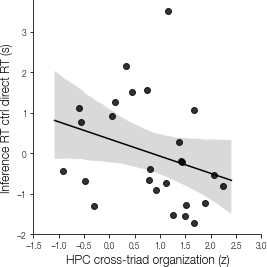

In [16]:
fig = plt.figure(figsize=(4, 4))
ax = sns.regplot(x='vec_lhpc', y='inference_ctrl', color='k', data=df)
ax.set_xlabel('HPC cross-triad organization (z)')
ax.set_ylabel('Inference RT ctrl direct RT (s)')
h = ax.set_xlim(-1.5, 3)
fig.savefig(os.path.join(fig_dir, 'vec_hpc_inf_ctrl_dir.pdf'))

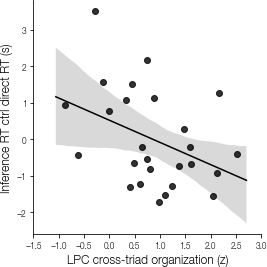

In [17]:
fig = plt.figure(figsize=(4, 4))
ax = sns.regplot(x='vec_llpc', y='inference_ctrl', color='k', data=df)
ax.set_xlabel('LPC cross-triad organization (z)')
ax.set_ylabel('Inference RT ctrl direct RT (s)')
h = ax.set_xlim(-1.5, 3)
fig.savefig(os.path.join(fig_dir, 'vec_lpc_inf_ctrl_dir.pdf'))

### Triad separation

In [18]:
# only test PHC
stat = np.zeros(n_perm + 1)
for i, ind in enumerate(rand_ind):
    stat[i] = st.spearmanr(tri.loc[:, 'lphc'].values[ind], 
                           df.inference_ctrl.values)[0]
pv = np.count_nonzero(stat <= stat[0]) / stat.size
print(f'M={stat[0]}, p={pv}')

M=-0.13299145299145299, p=0.26037396260373963


## Visualize item patterns

Use MDS to visualize some patterns from sample ROIs and participants.

In [19]:
roi_dir = '/Users/morton/work/mistr/batch/glm/disp_stim_fix2/roi'
hpc_dir = os.path.join(roi_dir, 'vec_triad_lhpc_dil1')
mds_hpc = rsa.item_mds_roi(hpc_dir, runs='post', item_types=(1, 3), train_type=2)

In [20]:
phc_dir = os.path.join(roi_dir, 'vec_triad_lphc_dil1')
mds_phc = rsa.item_mds_roi(phc_dir, runs='post', item_types=(1, 3), train_type=2)

In [21]:
# get phase-specific z-stats
vec_i = rsa.zstat_pivot(df_vector, 'inter')
tri_i = rsa.zstat_pivot(df_vectri, 'inter')

lhpc, inter, mistr_05
vec: -0.1573106846101707
tri: 0.15640673498866506

lhpc, inter, mistr_09
vec: 1.1503493803760079
tri: -1.7158397267044354

lphc, inter, mistr_24
vec: 1.1503493803760079
tri: 1.3806608580403217



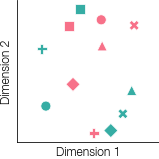

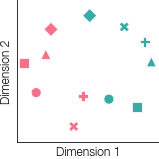

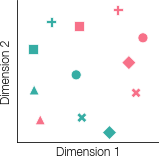

In [25]:
# plot a couple examples
fig_dir = '/Users/morton/Dropbox/work/mistr/figs2/plots'
mds = {'lhpc': mds_hpc, 'lphc': mds_phc}
subj_idx = [2, 6, 19]
roi_names = ['lhpc', 'lhpc', 'lphc']
cond = 'inter'
subj_ids = vec_i.index.values

for idx, roi in zip(subj_idx, roi_names):
    # get mds projection for this subject and ROI
    subj_id = subj_ids[idx]
    mds_subj = mds[roi].loc[mds[roi].subj_idx == idx]
    
    print(f'{roi}, {cond}, {subj_id}')
    print(f'vec: {vec_i.loc[subj_id, roi]}')
    print(f'tri: {tri_i.loc[subj_id, roi]}')
    print()
    
    plt.figure(figsize=(2.5, 2.5));
    ax = sns.scatterplot(x='Dimension 1', y='Dimension 2', 
                         hue='item_type', style='triad', 
                         data=mds_subj, s=100, 
                         palette=sns.color_palette("husl", 2))
    ax.get_legend().remove()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('equal')
    ax.set_ylabel('Dimension 2')
    fig = ax.get_figure()
    fig.savefig(os.path.join(fig_dir, f'{roi}_{cond}_{subj_id}_mds.pdf'))